In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download("AAPL NESN.SW BMW.DE TSLA NIO", start="2019-01-01", end="2022-12-01")['Close']

[*********************100%***********************]  5 of 5 completed


<AxesSubplot: xlabel='Date'>

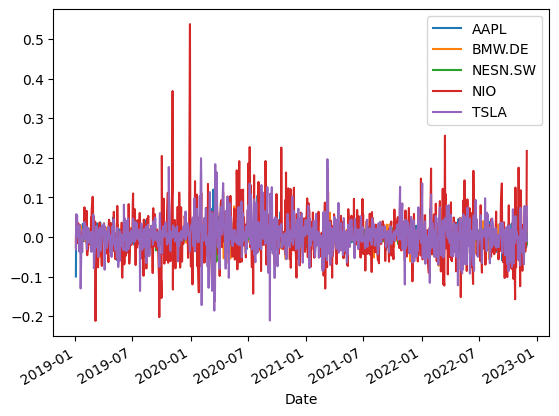

In [5]:
data.pct_change().plot()